<a href="https://colab.research.google.com/github/samirapakravan/PyTorch_Projects/blob/main/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple RNN


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
x = torch.linspace(0,799,800)
y = torch.sin(x*2*3.14/40)

(-10.0, 801.0)

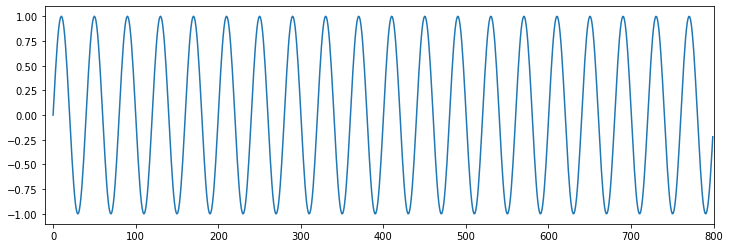

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(x,y)
plt.xlim(-10,801)


In [ ]:
test_size = 40
train_data = y[:-40]          # 0-799 --> 800   so train_data: 800-40 = 760
test_data = y[-test_size:]

(-10.0, 801.0)

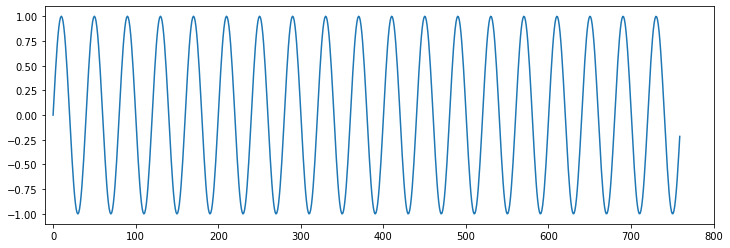

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train_data)
plt.xlim(-10,801)

In [ ]:
def input_data(seq, ws): # takes training data chops into batches with size of window 
  out = [] # will be list of tuples [([chunk], [label])] --> [ ([0,1,2,3],[4]), ([1,2,3,4],[5]), ... ]

  for i in range(len(seq)-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]  # label in this case is only one point in the future it can be more
    out.append((window,label))
  
  return out

In [ ]:
window_size = 40
train_data = input_data(train_data, window_size)   # 760-40 = 720

len(train_data)

720

In [ ]:
train_data[0]

(tensor([ 0.0000,  0.1564,  0.3089,  0.4538,  0.5875,  0.7068,  0.8087,  0.8908,
          0.9509,  0.9876,  1.0000,  0.9878,  0.9514,  0.8915,  0.8097,  0.7080,
          0.5888,  0.4552,  0.3104,  0.1579,  0.0016, -0.1548, -0.3074, -0.4524,
         -0.5862, -0.7057, -0.8078, -0.8900, -0.9504, -0.9873, -1.0000, -0.9881,
         -0.9518, -0.8922, -0.8106, -0.7091, -0.5901, -0.4566, -0.3119, -0.1595]),
 tensor([-0.0032]))

In [ ]:
class LSTM(nn.Module):
  def __init__(self, input_size=1, hidden_size=50, output_size=1):
    super().__init__()

    self.hidden_size = hidden_size
    self.lstm = nn.LSTM(input_size, hidden_size)
    self.linear = nn.Linear(hidden_size, output_size)

    self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))  # (h,c)


  def forward(self, seq):

    lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden) # seq.view(40,1, bach_size)
    pred = self.linear(lstm_out.view(len(seq),-1))

    return pred[-1]  # since pred will be the original seq along with prediction but we just want the last part
                     # e.g if seq: [1,2,3] & label [4] ---> pred:[1,2,3,4]  we just want to report 


In [ ]:
model = LSTM()
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.MSELoss()  # since it's a continues value MSE
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # SGD works better in this case

In [ ]:
epochs = 10
future = 40

for i in range(epochs):
  for seq, y_train in train_data:

    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))

    y_pred = model(seq)

    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()

  print(f'Epoch{i}  loss:{loss}')

  preds = train_data[-window_size:]

Epoch0  loss:0.045880045741796494
Epoch1  loss:0.015374195761978626
Epoch2  loss:0.0019430021056905389
Epoch3  loss:0.00046094151912257075
Epoch4  loss:0.0002973482187371701
Epoch5  loss:0.00024414947256445885
Epoch6  loss:0.00021007565374020487
Epoch7  loss:0.00018447413458488882
Epoch8  loss:0.00016458453319501132
Epoch9  loss:0.00014889340673107654


In [ ]:

l =[]
for seq, label in preds:
  l.append(label)

print(l)

[tensor([-0.0573]), tensor([0.0995]), tensor([0.2539]), tensor([0.4020]), tensor([0.5402]), tensor([0.6651]), tensor([0.7737]), tensor([0.8632]), tensor([0.9316]), tensor([0.9769]), tensor([0.9983]), tensor([0.9951]), tensor([0.9674]), tensor([0.9160]), tensor([0.8420]), tensor([0.7473]), tensor([0.6342]), tensor([0.5055]), tensor([0.3643]), tensor([0.2143]), tensor([0.0589]), tensor([-0.0979]), tensor([-0.2523]), tensor([-0.4005]), tensor([-0.5389]), tensor([-0.6639]), tensor([-0.7727]), tensor([-0.8624]), tensor([-0.9310]), tensor([-0.9766]), tensor([-0.9982]), tensor([-0.9953]), tensor([-0.9678]), tensor([-0.9166]), tensor([-0.8428]), tensor([-0.7483]), tensor([-0.6354]), tensor([-0.5068]), tensor([-0.3658]), tensor([-0.2158])]


In [ ]:
x = np.linspace(760,800,40)
x

array([760.        , 761.02564103, 762.05128205, 763.07692308,
       764.1025641 , 765.12820513, 766.15384615, 767.17948718,
       768.20512821, 769.23076923, 770.25641026, 771.28205128,
       772.30769231, 773.33333333, 774.35897436, 775.38461538,
       776.41025641, 777.43589744, 778.46153846, 779.48717949,
       780.51282051, 781.53846154, 782.56410256, 783.58974359,
       784.61538462, 785.64102564, 786.66666667, 787.69230769,
       788.71794872, 789.74358974, 790.76923077, 791.79487179,
       792.82051282, 793.84615385, 794.87179487, 795.8974359 ,
       796.92307692, 797.94871795, 798.97435897, 800.        ])

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


(700.0, 800.0)

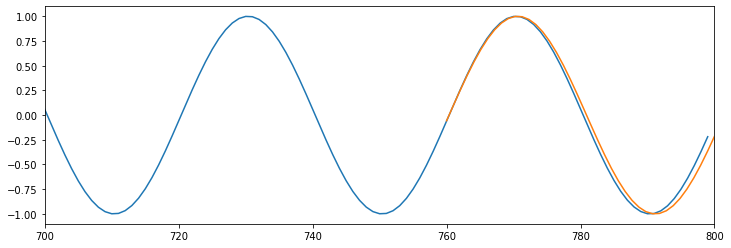

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(y)
plt.plot(x,[i for i in l])
plt.xlim(700,800)